# Small Multiples Maps in Matplotlib

In [1]:
import geopandas as gpd
import geopandas 
from shapely.geometry import Polygon
from shapely.geometry import Point
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import matplotlib.cm as cm # for colors
import matplotlib.colors as colors # for more colors

In [4]:
data={
    'ms4s': {'path':'data/HudsonEstuary/ms4_outfalls/MS4Outfalls_study_area.shp'},
    'csos':{'path': 'data/HudsonEstuary/CSOs/CSOs_studyarea.shp'},
    'bl':{'path': 'data/HudsonEstuary/boatlaunches/boatlaunches_NJ_NY.shp'},
    'waterbodies':{'path':'data/HudsonEstuary/waterbody_regions/waterbodies.shp'},
    'ba':{'path':'data/HudsonEstuary/boundingarea/boundingarea.shp'},
    'sa':{'path':'data/HudsonEstuary/study_area/study_area.shp'},
    'watershape':{'path':'data/HudsonEstuary/region_water_shape/region_water_shape.shp'},
    'beaches':{'path':'data/HudsonEstuary/Beaches/beaches_merge_1.shp'},
    'sa_poly':{'path':'data/HudsonEstuary/study_area/study_area_polygon.shp'},
    'stations':{'path':'data/HudsonEstuary/sampling_stations_used_for_analysis/sampling_stations_used_for_analysis.shp'}
}


In [5]:
for k, v in data.items():
    gdf = geopandas.read_file(data[k]['path'])
    if k =='stations':
        gdf = gdf[gdf['Station'] != '466']
    data[k]['gdf'] = gdf

In [8]:
len(data.keys())  # number of layers as in our data.keys()

10

In [9]:
data.keys()

dict_keys(['ms4s', 'csos', 'bl', 'waterbodies', 'ba', 'sa', 'watershape', 'beaches', 'sa_poly', 'stations'])

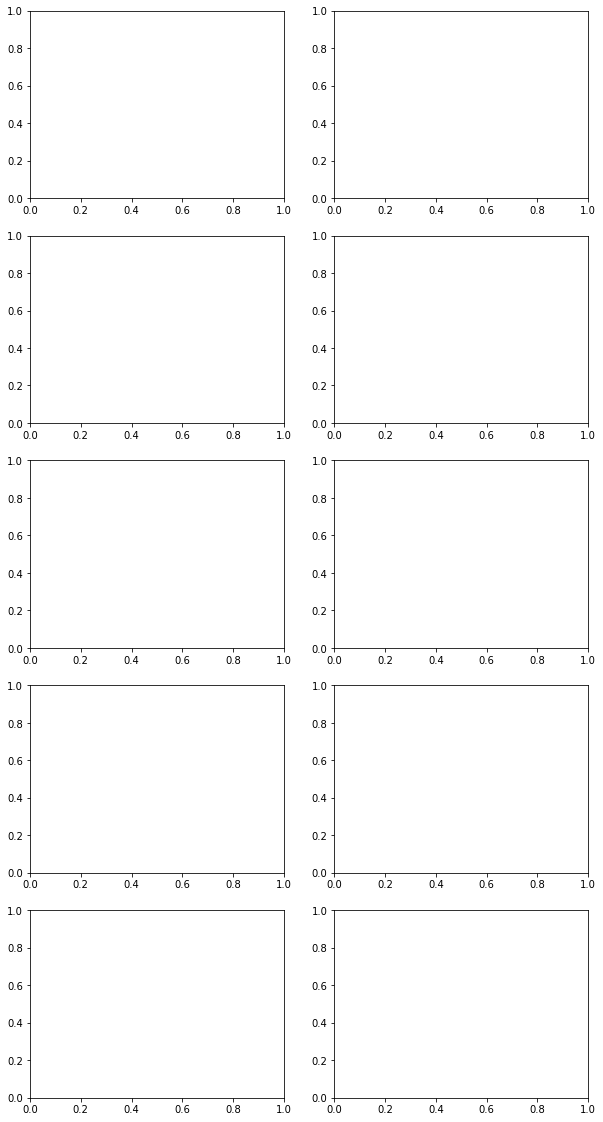

In [29]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

In [37]:
ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa0949310>,
      dtype=object)

### The `ax` object is a list of lists, each row is a list item, inside each row is a list of the columns

In [38]:
axes_list = []

for ax_row in ax:
    for ax_col in ax_row:
        axes_list.append(ax_col)
    

Above, we looped through and added each access to a list that we can iterate in conjunction with our `data.keys()`

In [34]:
len(axes_list)  # double check the axis_list length

10

In [40]:
for axes, key in zip(axes_list, data.keys()):
    print(key, '-', axes)

ms4s - AxesSubplot(0.125,0.749828;0.352273x0.130172)
csos - AxesSubplot(0.547727,0.749828;0.352273x0.130172)
bl - AxesSubplot(0.125,0.593621;0.352273x0.130172)
waterbodies - AxesSubplot(0.547727,0.593621;0.352273x0.130172)
ba - AxesSubplot(0.125,0.437414;0.352273x0.130172)
sa - AxesSubplot(0.547727,0.437414;0.352273x0.130172)
watershape - AxesSubplot(0.125,0.281207;0.352273x0.130172)
beaches - AxesSubplot(0.547727,0.281207;0.352273x0.130172)
sa_poly - AxesSubplot(0.125,0.125;0.352273x0.130172)
stations - AxesSubplot(0.547727,0.125;0.352273x0.130172)


### Now let's use that same loop to iterate and add plots to the axes

In [50]:
colors={
    'grey1': '#e7e6e0', 
    'grey2': '#C7C3BB',
    'grey3':'#B9B3AA',
    'grey4': '#56524A',
    'hab_g': '#93C15C',
    'wq_bl': '#4fa4e3',
    'mt_p': '#A95A9B',
    'ce_or': '#fcb103',
    'cc_y': '#E3BE3A',
    'hep_r': '#fc5203'    
}

In [53]:
watershape = data['watershape']['gdf']
ba = data['ba']['gdf']

In [57]:
for axes, key in zip(axes_list, data.keys()):
    gdf = data[key]['gdf']
    
    axes.set_xlim(ba.bounds['minx'][0], ba.bounds['maxx'][0])  # note using axes here
    axes.set_ylim(ba.bounds['miny'][0], ba.bounds['maxy'][0])
    
    watershape.plot(
        ax=axes,
        facecolor=colors['grey1']
    )
    
    gdf.plot(ax=axes)

<Figure size 432x288 with 0 Axes>

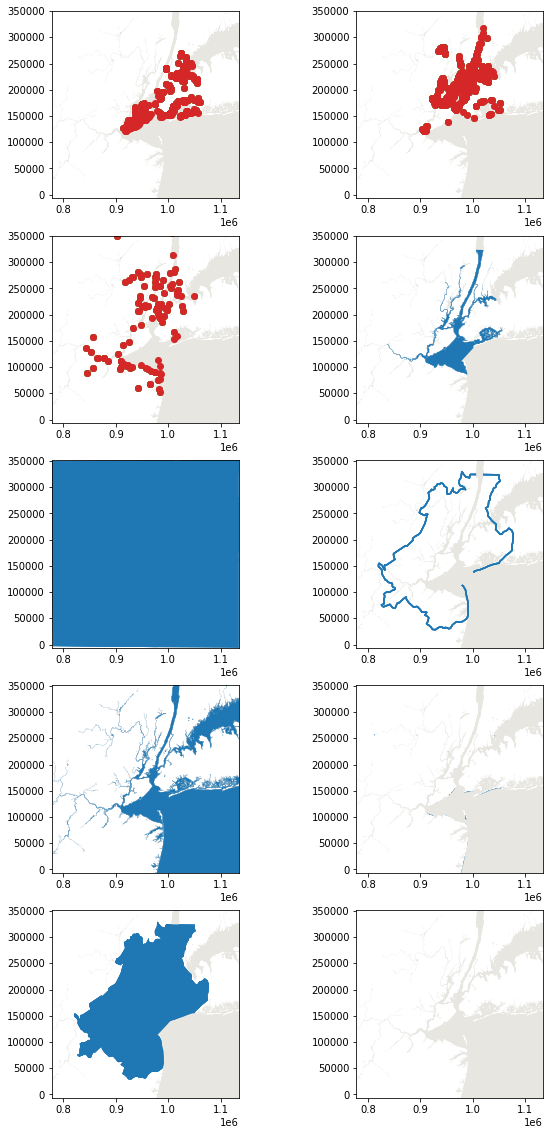

In [58]:
fig